In [3]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
df=pd.read_csv(r"C:\Users\shrikant\Desktop\content\SEM2\Machine Learning\LAB\Dataset\Blood Transfusion Service Center.csv")
df_tr=df
knn_graph = kneighbors_graph(df_tr, 30, include_self=False)

In [6]:
knn_graph

<748x748 sparse matrix of type '<class 'numpy.float64'>'
	with 22440 stored elements in Compressed Sparse Row format>

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\shrikant\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\shrikant\Anaconda3\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\shrikant\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\shrikant\Anaconda3\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Except

C:\Users\shrikant\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:480: UserWarning: the number of connected components of the connectivity matrix is 9 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
C:\Users\shrikant\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:480: UserWarning: the number of connected components of the connectivity matrix is 9 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
C:\Users\shrikant\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 9 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
C:\Users\shrikant\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:480: UserWarning: the number of connected components of the connectivity matrix is 9 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
C:\Users\shrikant\Anaconda3\lib\site-packages\skl

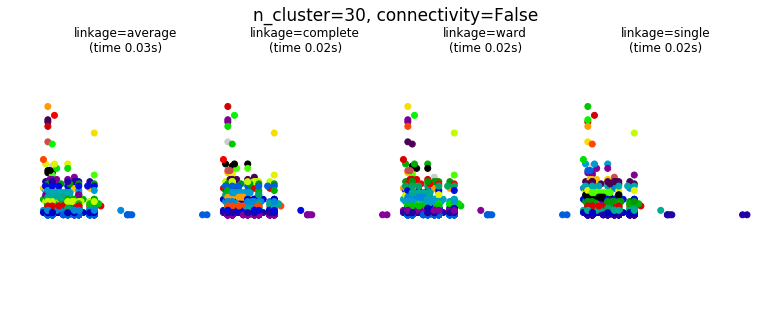

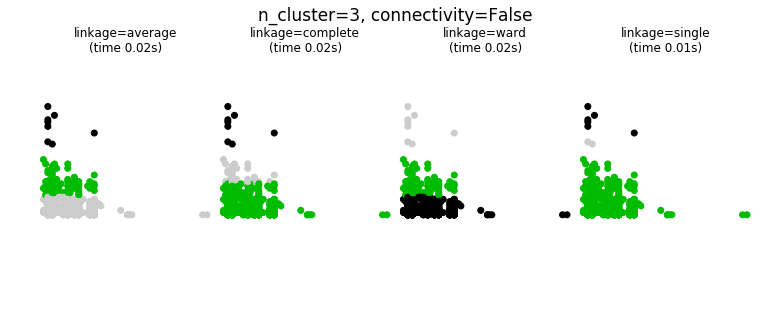

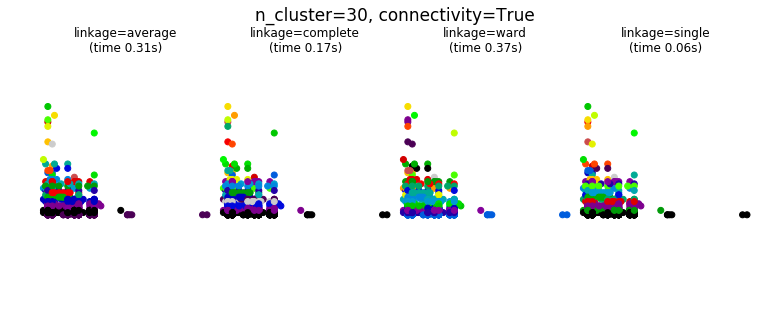

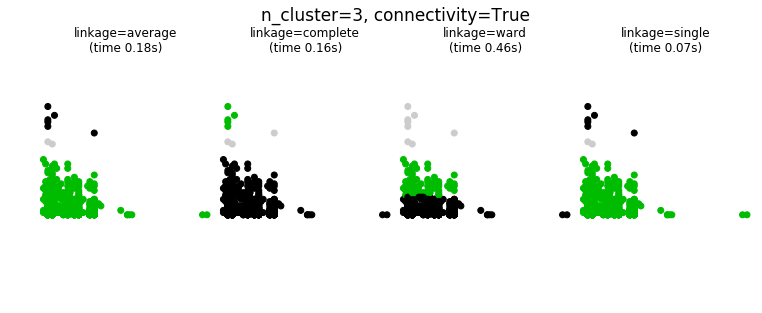

In [5]:
for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward',
                                         'single')):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(df_tr)
            elapsed_time = time.time() - t0
            plt.scatter(df_tr.iloc[:, 0], df_tr.iloc[:, 1], c=model.labels_,cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s\n(time %.2fs)' % (linkage, elapsed_time),fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()